<a href="https://colab.research.google.com/github/StephanieRomao/DataTwitter-Eleitoral/blob/main/Etapa_4_An%C3%A1lise_de_sentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
 
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [78]:
dataframe_sentimento = pd.read_csv('dataframe_final_candidatos_pronto_para_sentimento.csv')
dataframe_sentimento = dataframe_sentimento.astype(str)

In [79]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Cadidato,Tweet_limpo
0,2022-07-31 21:00:52+00:00,1553848191057027079,É Lula lá https://t.co/YUMyggYCD0,Lula,é lula lá
1,2022-07-31 21:00:51+00:00,1553848188360167424,"@lula__murphy @AlexScott I missed this, amazing",Lula,"i missed this, amazing"
2,2022-07-31 21:00:51+00:00,1553848188292956160,@LulaOficial Venha com tudo pra Paraíba.,Lula,venha com tudo pra paraíba.
3,2022-07-31 21:00:51+00:00,1553848188272082945,@CamiloSantanaCE @ricardostuckert @LulaOficial...,Lula,kkkkkkkkkk
4,2022-07-31 21:00:51+00:00,1553848186749558789,@ThiagoResiste Assembleia dos rodoviários onte...,Lula,assembleia dos rodoviários ontem em recife. o...


In [80]:
analisador_de_texto = SIA() 

In [81]:
dataframe_sentimento['Sentimento'] = dataframe_sentimento['Tweet_limpo'].apply(lambda i: analisador_de_texto.polarity_scores(' '.join(re.findall(r'\w+', i.lower()))))

In [82]:
dataframe_sentimento.head()
#dataframe_sentimento.tail() caso eu queira ver os últimos dados

,Data_Hora,IdTweet,Tweet,Cadidato,Tweet_limpo,Sentimento
0,2022-07-31 21:00:52+00:00,1553848191057027079,É Lula lá https://t.co/YUMyggYCD0,Lula,é lula lá,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2022-07-31 21:00:51+00:00,1553848188360167424,"@lula__murphy @AlexScott I missed this, amazing",Lula,"i missed this, amazing","{'neg': 0.314, 'neu': 0.143, 'pos': 0.543, 'co..."
2,2022-07-31 21:00:51+00:00,1553848188292956160,@LulaOficial Venha com tudo pra Paraíba.,Lula,venha com tudo pra paraíba.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2022-07-31 21:00:51+00:00,1553848188272082945,@CamiloSantanaCE @ricardostuckert @LulaOficial...,Lula,kkkkkkkkkk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2022-07-31 21:00:51+00:00,1553848186749558789,@ThiagoResiste Assembleia dos rodoviários onte...,Lula,assembleia dos rodoviários ontem em recife. o...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [83]:
dataframe_sentimento['Sentimento']

0        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1        {'neg': 0.314, 'neu': 0.143, 'pos': 0.543, 'co...
2        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                               ...                        
52010    {'neg': 0.084, 'neu': 0.916, 'pos': 0.0, 'comp...
52011    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
52012    {'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...
52013    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
52014    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentimento, Length: 52015, dtype: object

In [84]:
dataframe_sentimento['Positivo'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['pos'])
dataframe_sentimento['Negativo'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['neg'])
dataframe_sentimento['Neutro'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['neu'])
dataframe_sentimento['Composicao'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['compound'])

In [85]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Cadidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao
0,2022-07-31 21:00:52+00:00,1553848191057027079,É Lula lá https://t.co/YUMyggYCD0,Lula,é lula lá,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,2022-07-31 21:00:51+00:00,1553848188360167424,"@lula__murphy @AlexScott I missed this, amazing",Lula,"i missed this, amazing","{'neg': 0.314, 'neu': 0.143, 'pos': 0.543, 'co...",0.543,0.314,0.143,0.3818
2,2022-07-31 21:00:51+00:00,1553848188292956160,@LulaOficial Venha com tudo pra Paraíba.,Lula,venha com tudo pra paraíba.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
3,2022-07-31 21:00:51+00:00,1553848188272082945,@CamiloSantanaCE @ricardostuckert @LulaOficial...,Lula,kkkkkkkkkk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,2022-07-31 21:00:51+00:00,1553848186749558789,@ThiagoResiste Assembleia dos rodoviários onte...,Lula,assembleia dos rodoviários ontem em recife. o...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [86]:
sentimento = []

In [87]:
for i in dataframe_sentimento['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <= (-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')

In [88]:
sentimento

['Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutr

In [89]:
dataframe_sentimento['Sentimento_Final'] = sentimento

In [90]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Cadidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-31 21:00:52+00:00,1553848191057027079,É Lula lá https://t.co/YUMyggYCD0,Lula,é lula lá,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
1,2022-07-31 21:00:51+00:00,1553848188360167424,"@lula__murphy @AlexScott I missed this, amazing",Lula,"i missed this, amazing","{'neg': 0.314, 'neu': 0.143, 'pos': 0.543, 'co...",0.543,0.314,0.143,0.3818,Positivo
2,2022-07-31 21:00:51+00:00,1553848188292956160,@LulaOficial Venha com tudo pra Paraíba.,Lula,venha com tudo pra paraíba.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
3,2022-07-31 21:00:51+00:00,1553848188272082945,@CamiloSantanaCE @ricardostuckert @LulaOficial...,Lula,kkkkkkkkkk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
4,2022-07-31 21:00:51+00:00,1553848186749558789,@ThiagoResiste Assembleia dos rodoviários onte...,Lula,assembleia dos rodoviários ontem em recife. o...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro


In [91]:
dataframe_sentimento['Sentimento_Final'].value_counts()

Neutro      42317
Negativo     7081
Positivo     2617
Name: Sentimento_Final, dtype: int64

In [92]:
dataframe_sentimento['Cadidato'].unique()

array(['Lula', 'Bolsonaro', 'Ciro', 'Simone', 'Péricles', 'André'],
      dtype=object)

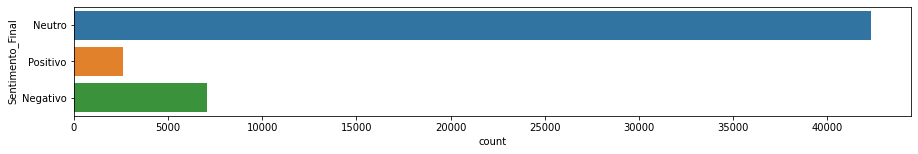

In [93]:
plt.figure(figsize=(15, 2))
sns.countplot(y='Sentimento_Final', data=dataframe_sentimento)

#Lula

In [94]:
resultado_filtro_lula = dataframe_sentimento[dataframe_sentimento['Cadidato'] == 'Lula']

In [95]:
resultado_filtro_lula.head()

,Data_Hora,IdTweet,Tweet,Cadidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-31 21:00:52+00:00,1553848191057027079,É Lula lá https://t.co/YUMyggYCD0,Lula,é lula lá,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
1,2022-07-31 21:00:51+00:00,1553848188360167424,"@lula__murphy @AlexScott I missed this, amazing",Lula,"i missed this, amazing","{'neg': 0.314, 'neu': 0.143, 'pos': 0.543, 'co...",0.543,0.314,0.143,0.3818,Positivo
2,2022-07-31 21:00:51+00:00,1553848188292956160,@LulaOficial Venha com tudo pra Paraíba.,Lula,venha com tudo pra paraíba.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
3,2022-07-31 21:00:51+00:00,1553848188272082945,@CamiloSantanaCE @ricardostuckert @LulaOficial...,Lula,kkkkkkkkkk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
4,2022-07-31 21:00:51+00:00,1553848186749558789,@ThiagoResiste Assembleia dos rodoviários onte...,Lula,assembleia dos rodoviários ontem em recife. o...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro


In [96]:
resultado_filtro_lula['Cadidato'].unique()

array(['Lula'], dtype=object)

In [97]:
resultado_filtro_lula['Sentimento_Final'].value_counts()

Neutro      8105
Negativo    1529
Positivo     367
Name: Sentimento_Final, dtype: int64

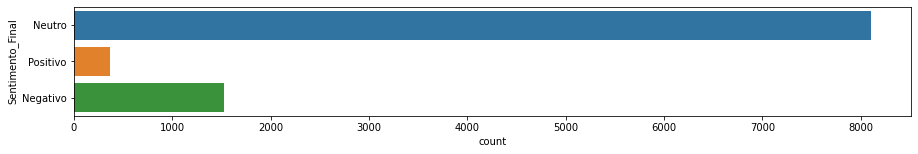

In [98]:
plt.figure(figsize=(15, 2))
sns.countplot(y='Sentimento_Final', data=resultado_filtro_lula)

#Bolsonaro

In [99]:
resultado_filtro_bolsonaro = dataframe_sentimento[dataframe_sentimento['Cadidato'] == 'Bolsonaro']

In [100]:
resultado_filtro_bolsonaro.head()

,Data_Hora,IdTweet,Tweet,Cadidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
10001,2022-07-31 21:04:31+00:00,1553849110826045447,@jairbolsonaro Faz o L,Bolsonaro,faz o l,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
10002,2022-07-31 21:04:29+00:00,1553849101262983168,@JoseMedeirosMT @jairbolsonaro Nenhuma,Bolsonaro,nenhuma,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
10003,2022-07-31 21:04:27+00:00,1553849092895277056,@FlavioBolsonaro @jairbolsonaro @FlavioBolsona...,Bolsonaro,seria possível o governo dar um incentivo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
10004,2022-07-31 21:04:25+00:00,1553849084271906817,ATENÇÃO: o Presidente Jair Bolsonaro estará em...,Bolsonaro,atenção: o presidente jair bolsonaro estará em...,"{'neg': 0.056, 'neu': 0.944, 'pos': 0.0, 'comp...",0.0,0.056,0.944,-0.296,Negativo
10005,2022-07-31 21:04:23+00:00,1553849075627442177,@jairbolsonaro Um fez 616km o bozo 32 km e diz...,Bolsonaro,um fez 616km o bozo 32 km e diz que a obra fo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro


In [101]:
resultado_filtro_bolsonaro['Cadidato'].unique()

array(['Bolsonaro'], dtype=object)

In [102]:
resultado_filtro_bolsonaro['Sentimento_Final'].value_counts()

Neutro      8656
Negativo    1039
Positivo     306
Name: Sentimento_Final, dtype: int64

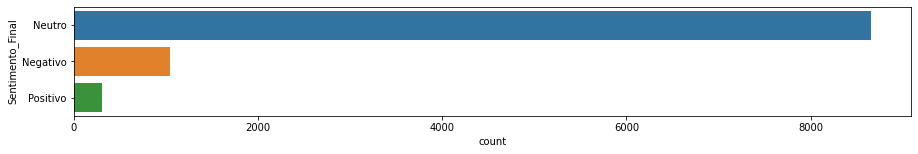

In [103]:
plt.figure(figsize=(15, 2))
sns.countplot(y='Sentimento_Final', data=resultado_filtro_bolsonaro)

#Ciro

In [104]:
resultado_filtro_ciro = dataframe_sentimento[dataframe_sentimento['Cadidato'] == 'Ciro']

In [105]:
resultado_filtro_ciro.head()

,Data_Hora,IdTweet,Tweet,Cadidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
20002,2022-07-31 21:08:26+00:00,1553850093496946692,@cirogomes @CartunistaT É até faz SENTIDO na h...,Ciro,é até faz sentido na hora do aperto o mestre...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
20003,2022-07-31 21:08:22+00:00,1553850078787510282,@Ruebster_ajalem @LulaOficial @jairbolsonaro @...,Ciro,é isso mesmoo povo morrendo na mão do esta...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
20004,2022-07-31 21:08:20+00:00,1553850071724294146,@GustavRamski @teixeira_aulus @cirogomes Idem ...,Ciro,idem kkkkkk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
20005,2022-07-31 21:08:14+00:00,1553850046541692937,cirogomes: Nosso povo tá cansado dessa históri...,Ciro,cirogomes: nosso povo tá cansado dessa históri...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
20006,2022-07-31 21:08:02+00:00,1553849995081678849,@77_frota Eu não sou massa de manobra do Ciro ...,Ciro,"eu não sou massa de manobra do ciro gomes, es...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro


In [106]:
resultado_filtro_ciro['Cadidato'].unique()

array(['Ciro'], dtype=object)

In [107]:
resultado_filtro_ciro['Sentimento_Final'].value_counts()

Neutro      8218
Negativo    1406
Positivo     377
Name: Sentimento_Final, dtype: int64

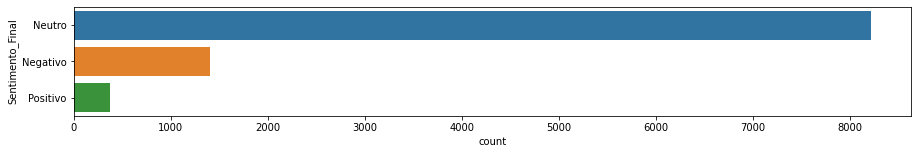

In [108]:
plt.figure(figsize=(15, 2))
sns.countplot(y='Sentimento_Final', data=resultado_filtro_ciro)

#Simone

In [109]:
resultado_filtro_simone = dataframe_sentimento[dataframe_sentimento['Cadidato'] == 'Simone']

In [110]:
resultado_filtro_simone.head()

,Data_Hora,IdTweet,Tweet,Cadidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
30003,2022-07-31 21:09:51+00:00,1553850451300335617,@velhosabujo Destruidor de candidaturas. A do ...,Simone,destruidor de candidaturas. a do marcio franç...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
30004,2022-07-31 21:09:48+00:00,1553850440315543553,@MDBMulher @simonetebetbr @MDB_Nacional ZUMA h...,Simone,zuma,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
30005,2022-07-31 21:08:02+00:00,1553849993810919425,Ee vc vai votar na Simone Tebet e não tem um b...,Simone,ee vc vai votar na simone tebet e não tem um b...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
30006,2022-07-31 21:07:13+00:00,1553849790005387269,@kellymatos @rosaneoliveira Mal caratismo da S...,Simone,mal caratismo da simone tebet e do psdb em d...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
30007,2022-07-31 21:06:34+00:00,1553849626855456775,Pesquisas trazem bomba para Simone Tebet e Cir...,Simone,pesquisas trazem bomba para simone tebet e cir...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro


In [111]:
resultado_filtro_simone['Sentimento_Final'].value_counts()

Neutro      8128
Negativo    1431
Positivo     442
Name: Sentimento_Final, dtype: int64

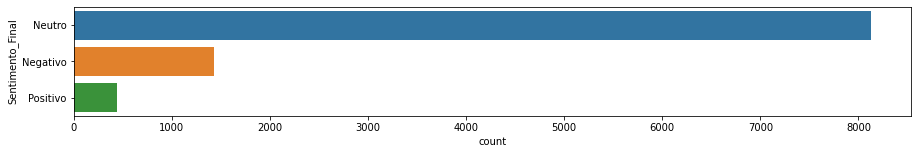

In [112]:
plt.figure(figsize=(15, 2))
sns.countplot(y='Sentimento_Final', data=resultado_filtro_simone)

#Péricles

In [113]:
resultado_filtro_pericles = dataframe_sentimento[dataframe_sentimento['Cadidato'] == 'Péricles']

In [114]:
resultado_filtro_pericles.head()

,Data_Hora,IdTweet,Tweet,Cadidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
40004,2022-07-31 19:53:33+00:00,1553831251072716801,"@EleicaoBr2022 Eymael, Leonardo Péricles?",Péricles,"eymael, leonardo péricles?","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
40005,2022-07-31 19:52:20+00:00,1553830944997507082,@rudaricci @LeiaOrganaPT No fim teremos de esc...,Péricles,no fim teremos de escolher entre eymael e le...,"{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp...",0.000,0.216,0.784,-0.2960,Negativo
40006,2022-07-31 18:41:01+00:00,1553812997390454784,@paulotbezerra @ArthurJ1993 @philliphonorato @...,Péricles,vou de leonardo péricles. no segundo turno...,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...",0.000,0.180,0.820,-0.5267,Negativo
40007,2022-07-31 17:29:46+00:00,1553795065331552261,lula e bolsonaro ok \nmas tem o leonardo peric...,Péricles,lula e bolsonaro ok mas tem o leonardo pericle...,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.167,0.000,0.833,0.2960,Positivo
40008,2022-07-31 16:00:35+00:00,1553772622281949184,Ciro e Lula estão perdendo meu voto no primeir...,Péricles,ciro e lula estão perdendo meu voto no primeir...,"{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'comp...",0.000,0.136,0.864,-0.2960,Negativo


In [115]:
resultado_filtro_pericles['Sentimento_Final'].value_counts()

Neutro      1170
Positivo     505
Negativo     335
Name: Sentimento_Final, dtype: int64

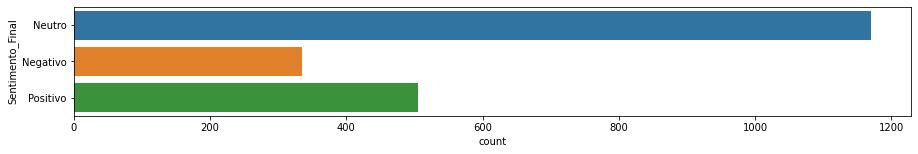

In [116]:
plt.figure(figsize=(15, 2))
sns.countplot(y='Sentimento_Final', data=resultado_filtro_pericles)

#André

In [117]:
resultado_filtro_andre = dataframe_sentimento[dataframe_sentimento['Cadidato'] == 'André']

In [118]:
resultado_filtro_andre.head()

,Data_Hora,IdTweet,Tweet,Cadidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
42014,2022-07-31 21:12:56+00:00,1553851228458729473,"é legal, vai! https://t.co/RMAr2Rh48R https://...",André,"é legal, vai!","{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.6,0.000,0.400,0.128,Positivo
42015,2022-07-31 20:59:24+00:00,1553847823644368897,Rogério…,André,rogério…,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
42016,2022-07-31 20:36:32+00:00,1553842067494813704,@danisab95 Boa amigo já cavou seu álibi aqui,André,boa amigo já cavou seu álibi aqui,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
42017,2022-07-31 20:33:38+00:00,1553841338126405632,@mandyzurc Já dancei nessa lava jato aí,André,já dancei nessa lava jato aí,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
42018,2022-07-31 20:30:22+00:00,1553840517426958337,Ainda tá rolando notificação de print no stories?,André,ainda tá rolando notificação de print no stories?,"{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp...",0.0,0.239,0.761,-0.296,Negativo


In [119]:
resultado_filtro_andre['Sentimento_Final'].value_counts()

Neutro      8040
Negativo    1341
Positivo     620
Name: Sentimento_Final, dtype: int64

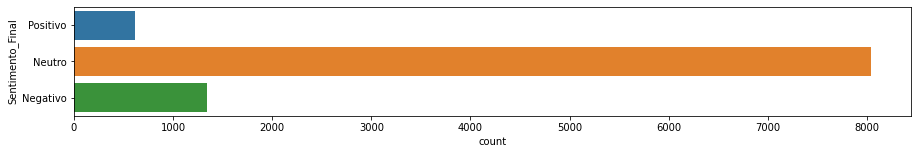

In [120]:
plt.figure(figsize=(15, 2))
sns.countplot(y='Sentimento_Final', data=resultado_filtro_andre)

#Finalização

In [121]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Cadidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-31 21:00:52+00:00,1553848191057027079,É Lula lá https://t.co/YUMyggYCD0,Lula,é lula lá,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
1,2022-07-31 21:00:51+00:00,1553848188360167424,"@lula__murphy @AlexScott I missed this, amazing",Lula,"i missed this, amazing","{'neg': 0.314, 'neu': 0.143, 'pos': 0.543, 'co...",0.543,0.314,0.143,0.3818,Positivo
2,2022-07-31 21:00:51+00:00,1553848188292956160,@LulaOficial Venha com tudo pra Paraíba.,Lula,venha com tudo pra paraíba.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
3,2022-07-31 21:00:51+00:00,1553848188272082945,@CamiloSantanaCE @ricardostuckert @LulaOficial...,Lula,kkkkkkkkkk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
4,2022-07-31 21:00:51+00:00,1553848186749558789,@ThiagoResiste Assembleia dos rodoviários onte...,Lula,assembleia dos rodoviários ontem em recife. o...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro


In [124]:
dataframe_apresentacao = dataframe_sentimento[['Data_Hora', 'IdTweet', 'Cadidato', 'Tweet_limpo', 'Sentimento_Final']]

In [125]:
dataframe_apresentacao.head()

,Data_Hora,IdTweet,Cadidato,Tweet_limpo,Sentimento_Final
0,2022-07-31 21:00:52+00:00,1553848191057027079,Lula,é lula lá,Neutro
1,2022-07-31 21:00:51+00:00,1553848188360167424,Lula,"i missed this, amazing",Positivo
2,2022-07-31 21:00:51+00:00,1553848188292956160,Lula,venha com tudo pra paraíba.,Neutro
3,2022-07-31 21:00:51+00:00,1553848188272082945,Lula,kkkkkkkkkk,Neutro
4,2022-07-31 21:00:51+00:00,1553848186749558789,Lula,assembleia dos rodoviários ontem em recife. o...,Neutro


In [126]:
dataframe_apresentacao.to_csv ('dataframe_apresentação.csv', sep= ',', index=False)